# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
0 4 2 0 5 1 1 3 0 2 2 4 3 2 3 3 0 4 5 1
3 1 5 2 0 2 2 3 2 2 2 6 2 1 3 1 3 1 5 4
5 5 3 2 2 0 2 1 1 3 2 3 5 3 5 2 5 2 1 1
2 3 4 3 2 3 2 4 2"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([0, 4, 2, 0, 5, 1, 1, 3, 0, 2, 2, 4, 3, 2, 3, 3, 0, 4, 5, 1, 3, 1, 5,
       2, 0, 2, 2, 3, 2, 2, 2, 6, 2, 1, 3, 1, 3, 1, 5, 4, 5, 5, 3, 2, 2, 0,
       2, 1, 1, 3, 2, 3, 5, 3, 5, 2, 5, 2, 1, 1, 2, 3, 4, 3, 2, 3, 2, 4, 2])

Сумма генеральної сукупності

In [2]:
an.sum()

173

In [3]:
sum(a)

173

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2 3 4 5 6]
[ 6 11  0 21  0 15  6  0  9  1]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 6, 1: 11, 2: 21, 3: 15, 4: 6, 5: 9, 6: 1}
[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

2

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[2]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

2


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

2.0
2


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]
[0.087, 0.159, 0.304, 0.217, 0.087, 0.13, 0.014]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6]
[6, 11, 21, 15, 6, 9, 1]
[ 0.08695652  0.15942029  0.30434783  0.2173913   0.08695652  0.13043478
  0.01449275]


Гістограма та полігон абсолютних частот

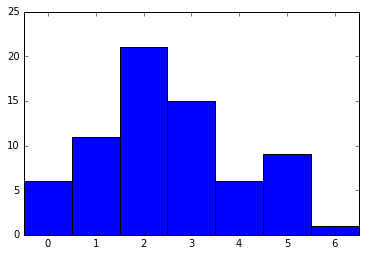

In [30]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

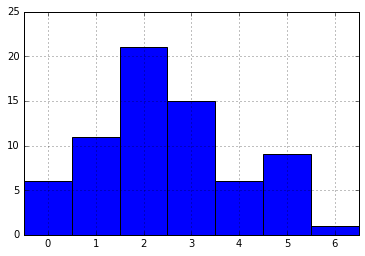

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

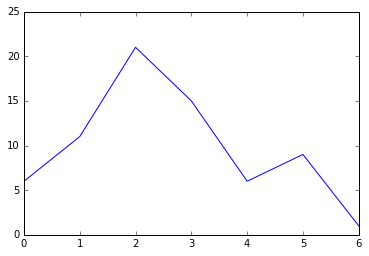

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

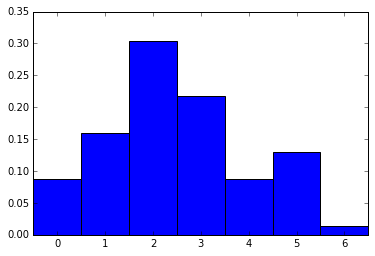

In [31]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

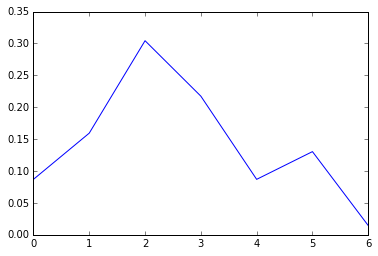

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

2.5072463768115942
2.50724637681


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

2.2536231884057973
2.253623188405796


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.2253728208359589

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

1.490289227893944
1.4902892278939437


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.594392813437


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.08695652173913043, 0.15942028985507245, 0.30434782608695654, 0.21739130434782608, 0.08695652173913043, 0.13043478260869565, 0.014492753623188406]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.087,  0.246,  0.551,  0.768,  0.855,  0.986,  1.   ])

Складемо другу статистичну таблицю

In [29]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,6,0,0.087,0.087
1,11,1,0.159,0.246
2,21,2,0.304,0.551
3,15,3,0.217,0.768
4,6,4,0.087,0.855
5,9,5,0.130,0.986
6,1,6,0.014,1.000
